### Single Perceptron Neural Networks for Linear Regression

You are ready to building your first neural network with a single perceptron.

After this assignment you will be able to:

Implement a neural network with a single perceptron and one input node for simple linear regression
Implement forward propagation using matrix multiplication
Implement a neural network with a single perceptron and two input nodes for multiple linear regression


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import pandas as pd
%matplotlib inline 

# Set a seed so that the results are consistent.
np.random.seed(3) 

### Dataset

First, let's get the dataset you will work on.


In [9]:
m = 30

X, Y = make_regression(n_samples=m, n_features=1, noise=20, random_state=1)

X = X.reshape((1, m))
Y = Y.reshape((1, m))

print('Training dataset X:')
print(X)
print('Training dataset Y')
print(Y)

Training dataset X:
[[ 0.3190391  -1.07296862  0.86540763 -0.17242821  1.14472371  0.50249434
  -2.3015387  -0.68372786 -0.38405435 -0.87785842 -2.06014071 -1.10061918
  -1.09989127  1.13376944  1.74481176 -0.12289023 -0.93576943  1.62434536
   1.46210794  0.90159072 -0.7612069   0.53035547 -0.52817175 -0.26788808
   0.58281521  0.04221375  0.90085595 -0.24937038 -0.61175641 -0.3224172 ]]
Training dataset Y
[[ -3.01854669 -65.65047675  26.96755728   8.70562603  57.94332628
   -0.69293498 -78.66594473 -12.73881492 -13.26721663 -24.80488085
  -74.24484385 -39.99533724 -22.70174437  73.46766345  55.7257405
   23.80417646 -13.45481508  25.57952246  75.91238321  50.91155323
  -43.7191551   -1.7025559  -16.44931235 -33.54041234  20.4505961
   18.35949302  37.69029586  -1.04801683  -4.47915933 -20.89431647]]


Text(0, 0.5, '$y$')

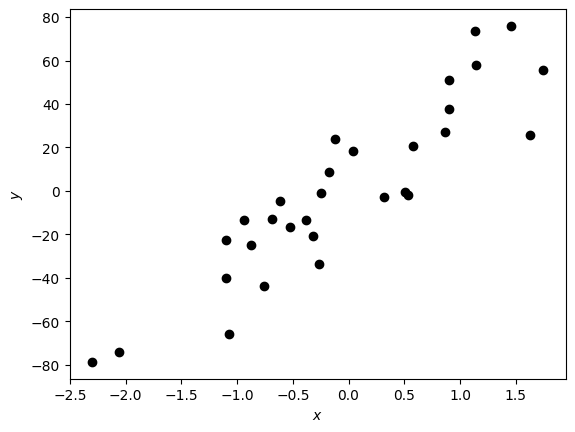

In [10]:
plt.scatter(X,  Y, c="black")

plt.xlabel("$x$")
plt.ylabel("$y$")

## Exercice 1 

What is the shape of the variables X and Y? In addition, how many training examples do you have?


In [14]:
shape_x = X.shape

In [15]:
shape_y = Y.shape

In [17]:
print ('The shape of X: ' + str(shape_x))
print ('The shape of Y: ' + str(shape_y))

The shape of X: (1, 30)
The shape of Y: (1, 30)


We have 30 training examples 

##  Implementation of the Neural Network Model for Linear Regression



## Exercise 2

Define two variables:

- n_x: the size of the input layer
- n_y: the size of the output layer

In [23]:
n_x = shape_x[0]

In [24]:
n_y = shape_y[0]

In [25]:
print(f"n_x (size of the input layer): {n_x}")
print(f"n_y (size of the output layer): {n_y}")

n_x (size of the input layer): 1
n_y (size of the output layer): 1


###  Initialize the Model's Parameters

Implement the function initialize_parameters().

Instructions:

- Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
- You will initialize the weights matrix with random values.
    - Use: np.random.randn(a,b) * 0.01 to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vector as zeros.
    - Use: np.zeros((a,b)) to initialize a matrix of shape (a,b) with zeros.

In [28]:
def initialize_parameters(n_x, n_y):
     W = np.random.randn(n_y, n_x) * 0.01
     b = np.zeros((n_y, 1))
     parameters = {
        "W": W,
        "b": b
     }
     return parameters

In [29]:
parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[0.01788628]]
b = [[0.]]


### The Loop

### Exercice 4
Implement forward_propagation().

In [34]:
def forward_propagation(X, parameters):
    W = parameters.get("W")
    b = parameters.get("b")
    Z = np.matmul(W,X) + b
    Y_hat = Z
    return Y_hat

In [35]:
Y_hat = forward_propagation(X, parameters)
print(Y_hat)

[[ 0.00570642 -0.01919142  0.01547893 -0.0030841   0.02047485  0.00898776
  -0.04116598 -0.01222935 -0.00686931 -0.01570163 -0.03684826 -0.01968599
  -0.01967297  0.02027892  0.0312082  -0.00219805 -0.01673744  0.0290535
   0.02615168  0.01612611 -0.01361516  0.00948609 -0.00944703 -0.00479152
   0.0104244   0.00075505  0.01611297 -0.00446031 -0.01094205 -0.00576685]]


Remember that your weights were just initialized with some random values, so the model has not been trained yet.
Define a cost function  which will be used to train the model:

The compute_cost function calculates the error between the neural network's predictions (Y_hat) and the true values (Y) using mean squared error. It sums the squared differences, then divides by the number of examples to get the average cost, which helps adjust the model's weights.

In [37]:
def compute_cost(Y_hat,Y):
    m = Y.shape[1]
    cost = np.sum((Y_hat - Y)**2)/(2*m)
    return cost

In [38]:
print("cost = " + str(compute_cost(Y_hat, Y)))

cost = 790.2189412622606


You want to minimize the cost value, bringing it as close as possible to 0,

In [ ]:
parameters = w3_tools.train_nn(parameters, Y_hat, X, Y)

print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

In [48]:
W = [[43.63366703]]
b = [[0.17926448]]

### Exercise 5
Build your neural network model in nn_model().

Instructions: The neural network model has to use the previous functions in the right order.

In [49]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, num_iterations=10, print_cost=False):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]
    # Initialize parameters
    ### START CODE HERE ### (~ 1 line of code)
    parameters = initialize_parameters(n_x, n_y)
    ### END CODE HERE ###
    
    # Loop
    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (~ 2 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "Y_hat".
        Y_hat = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "Y_hat, Y". Outputs: "cost".
        cost = compute_cost(Y_hat, Y)
        ### END CODE HERE ###
        
        
        # Parameters update.
        parameters = w3_tools.train_nn(parameters, Y_hat, X, Y) 
        
        # Print the cost every iteration.
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [ ]:
parameters = nn_model(X, Y, num_iterations=15, print_cost=True)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W_simple = parameters["W"]
b_simple = parameters["b"]

In [ ]:
Cost after iteration 0: 791.431703
Cost after iteration 1: 176.530000
Cost after iteration 2: 143.772255
Cost after iteration 3: 141.433606
Cost after iteration 4: 141.248744
Cost after iteration 5: 141.233728
Cost after iteration 6: 141.232500
Cost after iteration 7: 141.232400
Cost after iteration 8: 141.232391
Cost after iteration 9: 141.232391
Cost after iteration 10: 141.232391
Cost after iteration 11: 141.232391
Cost after iteration 12: 141.232391
Cost after iteration 13: 141.232391
Cost after iteration 14: 141.232391
W = [[35.71958208]]
b = [[2.2893077]]

You can see that after a few iterations the cost function does not change anymore (the model converges).

Note: This is a very simple model. In reality the models do not converge that quickly.


### Multiple Linear Regression
Models are not always as simple as the one above. In some cases your output is dependent on more than just one variable. Let's look at the case where the output depends on two input variables.

In [54]:
df = pd.read_csv('Projet/Dataset/train.csv')

In [55]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Output

In [59]:
X_multi = df[['GrLivArea', 'OverallQual']]

Input

In [57]:
Y_multi = df['SalePrice']

In [60]:
print(f"X_multi:\n{X_multi}\n")
print(f"Y_multi:\n{Y_multi}\n")

X_multi:
      GrLivArea  OverallQual
0          1710            7
1          1262            6
2          1786            7
3          1717            7
4          2198            8
...         ...          ...
1455       1647            6
1456       2073            6
1457       2340            7
1458       1078            5
1459       1256            5

[1460 rows x 2 columns]

Y_multi:
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64



All the original arrays have different units. To train the neural network efficiently, we use normalization: subtract the array's mean from each element and divide by its standard deviation. This brings the data to the same scale for better performance. Mean and standard deviation will be covered in detail in the third Course of the Specialization.

In [61]:
X_multi_norm = (X_multi - np.mean(X_multi))/np.std(X_multi)
Y_multi_norm = (Y_multi - np.mean(Y_multi))/np.std(Y_multi)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [62]:
X_multi_norm = np.array(X_multi_norm).T
Y_multi_norm = np.array(Y_multi_norm).reshape((1, len(Y_multi_norm)))

print ('The shape of X: ' + str(X_multi_norm.shape))
print ('The shape of Y: ' + str(Y_multi_norm.shape))
print ('I have m = %d training examples!' % (X_multi_norm.shape[1]))

The shape of X: (2, 1460)
The shape of Y: (1, 1460)
I have m = 1460 training examples!


### Performance of the Neural Network Model for Multiple Linear Regression

The magic is that now you do not need to change anything in your neural network implementation! Go through the code in section 2 and see that if you pass new datasets X_multi_norm and Y_multi_norm, the input layer size 
 will get equal to 
 and the rest of the implementation will remain exactly the same. That's the power of the neural networks (and matrix multiplication)!

### Exercise 6
Run the constructed above neural network model nn_model() for 100 iterations, passing the training dataset saved in the arrays X_multi_norm and Y_multi_norm.

In [ ]:
### START CODE HERE ### (~ 1 line of code)
parameters_multi = nn_model(X_multi_norm, Y_multi_norm, num_iterations=100, print_cost=True)
### END CODE HERE ###

print("W = " + str(parameters_multi["W"]))
print("b = " + str(parameters_multi["b"]))

W_multi = parameters_multi["W"]
b_multi = parameters_multi["b"]

In [ ]:
Cost after iteration 0: 0.489797
Cost after iteration 1: 0.429192
Cost after iteration 2: 0.380299
Cost after iteration 3: 0.340051
Cost after iteration 4: 0.306705
Cost after iteration 5: 0.279020
Cost after iteration 6: 0.256020
Cost after iteration 7: 0.236908
Cost after iteration 8: 0.221025
Cost after iteration 9: 0.207827
Cost after iteration 10: 0.196858
Cost after iteration 11: 0.187743
Cost after iteration 12: 0.180169
Cost after iteration 13: 0.173874
Cost after iteration 14: 0.168642
Cost after iteration 15: 0.164295
Cost after iteration 16: 0.160682
Cost after iteration 17: 0.157680
Cost after iteration 18: 0.155185
Cost after iteration 19: 0.153111
Cost after iteration 20: 0.151388
Cost after iteration 21: 0.149956
Cost after iteration 22: 0.148766
Cost after iteration 23: 0.147777
Cost after iteration 24: 0.146955
Cost after iteration 25: 0.146272
Cost after iteration 26: 0.145705
Cost after iteration 27: 0.145233
Cost after iteration 28: 0.144841
Cost after iteration 29: 0.144515
Cost after iteration 30: 0.144245
Cost after iteration 31: 0.144020
Cost after iteration 32: 0.143833
Cost after iteration 33: 0.143677
Cost after iteration 34: 0.143548
Cost after iteration 35: 0.143441
Cost after iteration 36: 0.143352
Cost after iteration 37: 0.143278
Cost after iteration 38: 0.143216
Cost after iteration 39: 0.143165
Cost after iteration 40: 0.143123
Cost after iteration 41: 0.143087
Cost after iteration 42: 0.143058
Cost after iteration 43: 0.143033
Cost after iteration 44: 0.143013
Cost after iteration 45: 0.142996
Cost after iteration 46: 0.142982
Cost after iteration 47: 0.142971
Cost after iteration 48: 0.142961
Cost after iteration 49: 0.142953
Cost after iteration 50: 0.142946
Cost after iteration 51: 0.142941
Cost after iteration 52: 0.142936
Cost after iteration 53: 0.142932
Cost after iteration 54: 0.142929
Cost after iteration 55: 0.142926
Cost after iteration 56: 0.142924
Cost after iteration 57: 0.142922
Cost after iteration 58: 0.142921
Cost after iteration 59: 0.142920
Cost after iteration 60: 0.142919
Cost after iteration 61: 0.142918
Cost after iteration 62: 0.142917
Cost after iteration 63: 0.142916
Cost after iteration 64: 0.142916
Cost after iteration 65: 0.142915
Cost after iteration 66: 0.142915
Cost after iteration 67: 0.142915
Cost after iteration 68: 0.142915
Cost after iteration 69: 0.142914
Cost after iteration 70: 0.142914
Cost after iteration 71: 0.142914
Cost after iteration 72: 0.142914
Cost after iteration 73: 0.142914
Cost after iteration 74: 0.142914
Cost after iteration 75: 0.142914
Cost after iteration 76: 0.142914
Cost after iteration 77: 0.142914
Cost after iteration 78: 0.142914
Cost after iteration 79: 0.142914
Cost after iteration 80: 0.142914
Cost after iteration 81: 0.142913
Cost after iteration 82: 0.142913
Cost after iteration 83: 0.142913
Cost after iteration 84: 0.142913
Cost after iteration 85: 0.142913
Cost after iteration 86: 0.142913
Cost after iteration 87: 0.142913
Cost after iteration 88: 0.142913
Cost after iteration 89: 0.142913
Cost after iteration 90: 0.142913
Cost after iteration 91: 0.142913
Cost after iteration 92: 0.142913
Cost after iteration 93: 0.142913
Cost after iteration 94: 0.142913
Cost after iteration 95: 0.142913
Cost after iteration 96: 0.142913
Cost after iteration 97: 0.142913
Cost after iteration 98: 0.142913
Cost after iteration 99: 0.142913
W = [[0.36946186 0.5718172 ]]
b = [[1.40891864e-16]]


Remember, that the initial datasets were normalized. To make the predictions, you need to normalize the original, calculate predictions with the obtained linear regression coefficients and then denormalize the result (perform the reverse process of normalization):

In [ ]:
X_pred_multi = np.array([[1710, 7], [1200, 6], [2200, 8]]).T

# Normalize using the same mean and standard deviation of the original training array X_multi.
X_multi_mean = np.array(np.mean(X_multi)).reshape((2,1))
X_multi_std = np.array(np.std(X_multi)).reshape((2,1))
X_pred_multi_norm = (X_pred_multi - X_multi_mean)/ X_multi_std
# Make predictions.
Y_pred_multi_norm = np.matmul(W_multi, X_pred_multi_norm) + b_multi
# Denormalize using the same mean and standard deviation of the original training array Y_multi.
Y_pred_multi = Y_pred_multi_norm * np.std(Y_multi) + np.mean(Y_multi)

print(f"Ground living area, square feet:\n{X_pred_multi[0]}")
print(f"Rates of the overall quality of material and finish, 1-10:\n{X_pred_multi[1]}")
print(f"Predictions of sales price, $:\n{np.round(Y_pred_multi)}")